In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pathlib as plib
import sys
import mosek
import time

In [2]:
sys.path.append(".")
sys.path.append("../resources/results")
path = "../resources/results/final/"

In [3]:
def load(filename, other_path=""):
    if other_path == "":
        df_raw = pd.read_csv(path + filename)
    else :
        df_raw = pd.read_csv(other_path + filename)
    partitions = np.array(df_raw.columns[1:])
    df = df_raw.copy()
    df[partitions] = df_raw[partitions]/1000
    df["num_cores"].astype('string') + " cores"
    return df, partitions
    

In [4]:
def plot_partitions(name, df, partitions, ax=None):
    if ax == None :
        _, ax = plt.subplots()
    for i in df["num_cores"]:
        ax.plot(partitions, (df[df["num_cores"]==i][partitions]).to_numpy().reshape((-1)))
    
    ax.set_title("Time of " + name + " w.r.t. number of partitions")
    ax.set_ylabel('Time [s]')
    ax.set_xlabel('Number of partitions');  
    # plt.gca().set_ylim(bottom=0)
    ax.legend((df["num_cores"].astype('string') + " cores").values,  loc='upper right');

def plot_cores(name, df, partitions, ax=None):
    if ax == None :
        _, ax = plt.subplots()
    for p in partitions:
        ax.plot(df["num_cores"], df[p])
    
    ax.set_title(name + " w.r.t. number of cores")
    ax.set_ylabel('Time[s]')
    ax.set_xlabel('Number of cores');
    # plt.gca().set_ylim(bottom=0)
    ax.legend(df.columns[1:] + " partitions", loc='upper right');


def plot_result(name, date, df, partitions, plot_part = True, save=False):
    figsize = (8,4)
    num_cols = 1
    if plot_part:
        num_cols = 2
        figsize = (12,5)
    fig, ax = plt.subplots(nrows= 1,ncols=num_cols,figsize= figsize, sharey = True, sharex = False) 
    if plot_part :
        plot_partitions(name, df, partitions, ax[0])
        plot_cores(name, df, partitions, ax[1])
    else :
        plot_cores(name, df, partitions, ax)
    if save:
        plt.savefig(path + "plots/"+ name + date +'.png', dpi=80)
    plt.show()

### Sequential

In [5]:
joins_names = ["q1", "q2", "q3", "q4", "q5", "q6", "q7", "q8"]
other_names =  ["q9", "q10", "q11"]
all_names = joins_names + other_names

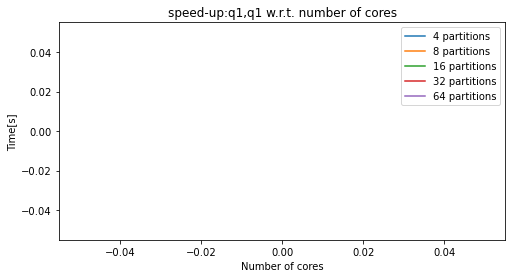

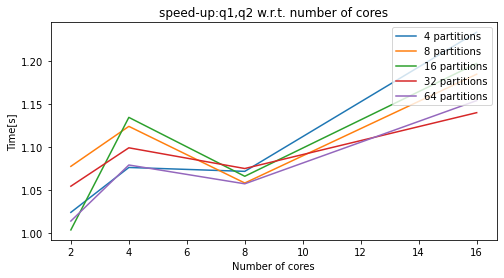

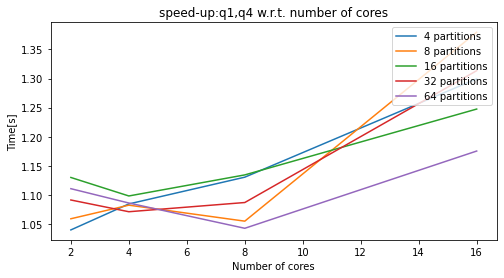

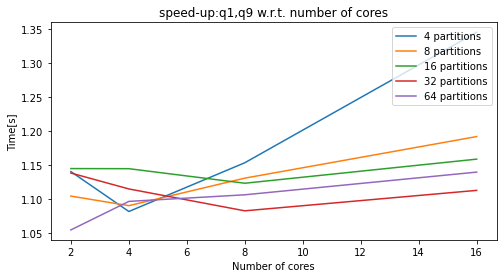

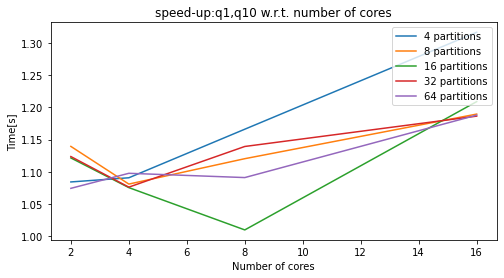

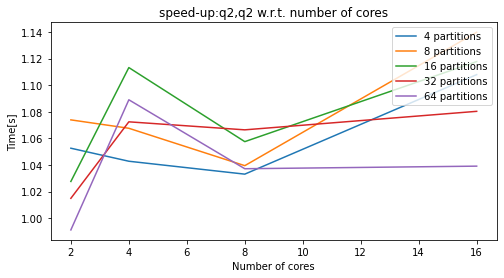

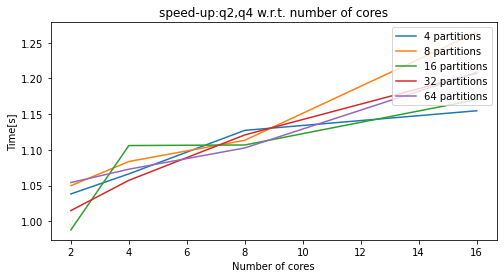

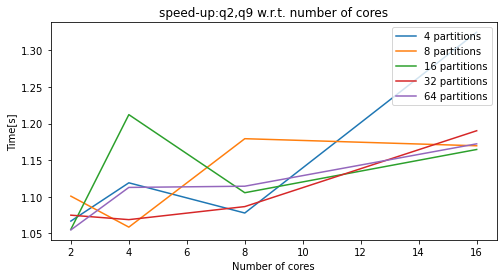

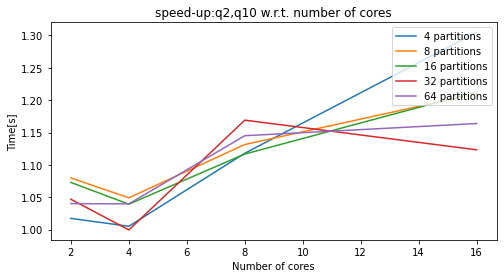

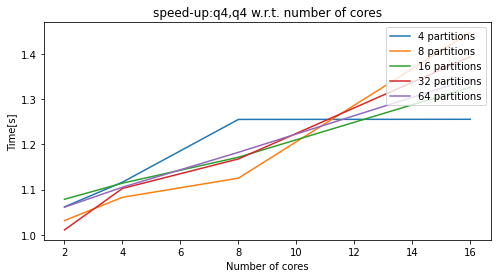

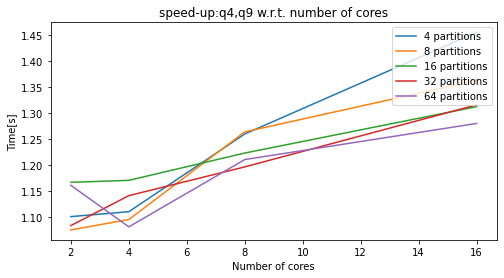

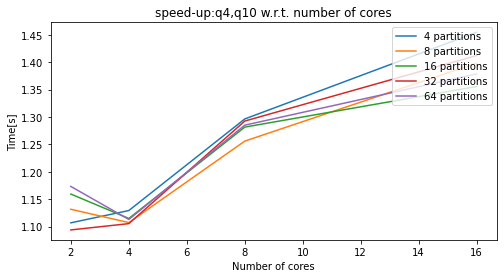

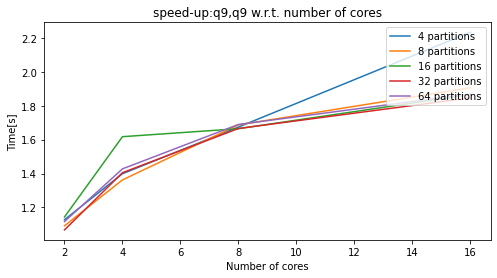

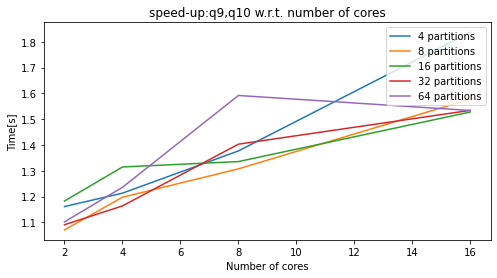

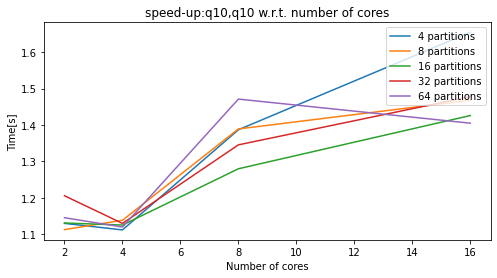

In [6]:
date = ""
par_names = ["q1", "q2", "q4", "q9", "q10"]
all_par_names = []
for i in range(len(par_names)):
    for j in range(i, len(par_names)):
        par_n = par_names[i] + "_" + par_names[j]
        par_filename = par_n + date + ".csv"
        df_par, _ = load(par_filename)
        df_par = df_par.drop(columns=['1'])
        
        par_filename = par_names[i] + ".csv"
        df_1, _ = load(par_filename)
        df_1 = df_1.drop(columns=['1'])
        
        par_filename = par_names[j] + ".csv"
        df_2, partitions = load(par_filename)
        df_2 = df_2.drop(columns=['1'])
        
        df = (df_1 + df_2)/df_par

        df['num_cores'] = [1,2,4,8,16]
        
        df = df.drop([0])
        df = df.drop(columns=['2'])
        partitions = partitions[2::]
        plot_result("speed-up:"+ par_names[i] + "," + par_names[j], date, df, partitions,False, True)   
         

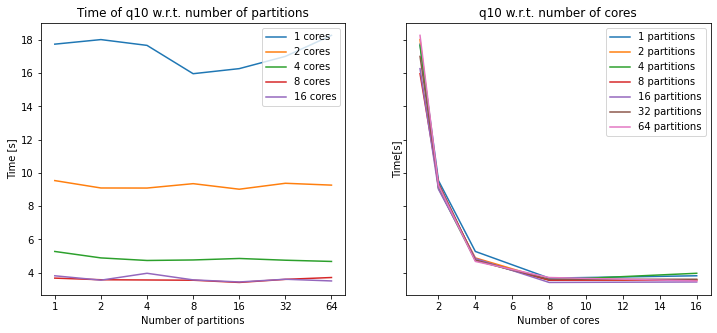

In [25]:
names = pd.Series("q10")
date = ""
filenames = names + date + ".csv"
for i in range(len(filenames)):
    df, partitions = load(filenames[i])
    # df = df.drop(columns=['1'])
    # partitions = partitions[1::]
    plot_result(names[i], date, df, partitions,True, True)   

In [26]:
df

,num_cores,1,2,4,8,16,32,64
0,1,17.734502,18.008639,17.660665,15.959304,16.263843,16.999036,18.263254
1,2,9.536660,9.092303,9.088336,9.352032,9.018794,9.375208,9.264082
2,4,5.278139,4.891111,4.736581,4.767701,4.856771,4.752254,4.678677
3,8,3.676785,3.578891,3.564944,3.549804,3.416591,3.602470,3.712874
4,16,3.817175,3.553355,3.967721,3.570489,3.445377,3.608371,3.506958


In [9]:
df['4']

0    74.152974
1    39.978776
2    19.354230
3    11.039087
4     7.345675
Name: 4, dtype: float64

In [10]:
# def plot_all(name, df, partitions, ax=None):
#     if ax == None :
#         _, ax = plt.subplots()
#     for p in partitions:
        
    
#     ax.set_title("Time of "+ name + " w.r.t. number of cores")
    
    # plt.gca().set_ylim(bottom=0)

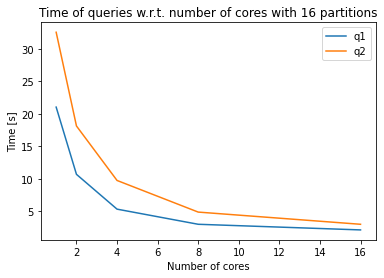

In [11]:
names = pd.Series(names[0:2])
date = ""
filenames = names + date + ".csv"
fig, ax = plt.subplots()
for i in range(len(filenames)):
    df, partitions = load(filenames[i])
    ax.plot(df["num_cores"], df['16'])
    ax.set_ylabel('Time [s]')
    ax.set_xlabel('Number of cores');
ax.legend(names);
ax.set_title("Time of queries w.r.t. number of cores with 16 partitions");

## Draft

In [12]:
def load_col(filename, num_partitions, other_path=""):
    if other_path == "":
        df_raw = pd.read_csv(path + filename)
    else:
        df_raw = pd.read_csv(other_path + filename)
    partitions = np.array(df_raw.columns[1:])
    df = df_raw.copy()
    df[partitions] = df_raw[partitions] / 1000
    df["num_cores"].astype('string') + " cores"
    # print(df['num_cores'])
    return df[num_partitions], df['num_cores']


def load2(queries: str, num_partitions: str, other_path=""):
    query_names = pd.Series(sorted(list(set(queries))))
    date = ""
    filenames = query_names + date + ".csv"
    df = pd.DataFrame()
    for i in range(len(filenames)):
        res, index = load_col(filenames[i], num_partitions)
        if i == 0 :
            df['num_cores'] = index
        df[query_names[i]] = res
    return df

    return df[num_partitions]

In [13]:
from scipy.interpolate import interp1d

In [14]:
q_list = ["q1", "q3", "q2", "q4","q2","q2", "q5", "q6",
         "q1", "q3", "q2", "q4","q2","q2", "q5", "q6",
         "q1", "q3", "q2", "q4","q2","q2", "q5", "q6",
         "q1", "q3", "q2", "q4","q2","q2", "q5", "q6"]
q_idx = dict([(x[1], x[0]) for x in list(enumerate(q_list))])


df = load2(q_list, '16')
x = df['num_cores']
y = df['q1']
f = interp1d(x, y, kind="linear")

# x_axis = np.linspace(1, 16, num=100, endpoint=True)
# plt.plot(x_axis, f(x_axis))

In [15]:
len(q_list)

32

In [16]:
    x = df['num_cores']
    names = list(df.columns.values)[1:]
    q_dict = {q:i for (i, q) in enumerate(names)}
    res = {}
    for n in names:
        f = interp1d(x, df[n], kind="linear")
        res.update({n: f})
    res

{'q1': <scipy.interpolate.interpolate.interp1d at 0x7fd09dedcc70>,
 'q2': <scipy.interpolate.interpolate.interp1d at 0x7fd09fc56c70>,
 'q3': <scipy.interpolate.interpolate.interp1d at 0x7fd09fc56a40>,
 'q4': <scipy.interpolate.interpolate.interp1d at 0x7fd09fc56e00>,
 'q5': <scipy.interpolate.interpolate.interp1d at 0x7fd0a05da5e0>,
 'q6': <scipy.interpolate.interpolate.interp1d at 0x7fd0a05da1d0>}

In [17]:
import cvxpy as cp
import numpy as np
from numpy.linalg import matrix_power
from numpy import linalg as LA

In [18]:
C = 16
C_ = int(C * 2)
Q = len(q_list)
R = 2
#time query i with j+1 cores
T = np.zeros((Q, C))
for q in range(Q):
    for c in range(C):
        T[q,c] = res[q_list[q]](c + 1)
T[1, 7]

6.8823521874999996

### First MILP Formulation

In [19]:
X = []
for q in range(Q):
    X.append(cp.Variable((C, R), boolean = True))

k = cp.Variable(R)

In [20]:
constr = []
for q in range(Q):
    constr.append(np.ones(C) @ X[q] @ np.ones(R) == 1)
#2
temp = []
cores = np.arange(1, C +1)
for q in range(Q):
    temp.append(cores @ X[q])

constr.append(sum(temp) <= C)

#3
for i in range(Q):
    constr.append(T[i,:].T @ X[i] <= k)

In [21]:
prob = cp.Problem(cp.Minimize(k @ np.ones(R)),
                  constr)
start_time = time.time()
prob.solve(solver=cp.MOSEK, 
           mosek_params = {mosek.dparam.mio_tol_rel_gap : 0.25,
                           #time in sec
                          # mosek.dparam.mio_max_time : 100
                          },
           verbose=False)
print(time.time() - start_time)

0.2996029853820801


In [22]:
# # Print result.
print("The optimal value is", prob.value)

The optimal value is 145.67673806725


In [23]:
res_schedule_mlp = []
for r in range(R):
    run_r = []
    for q in range(Q):
        for c in range(C):
            if round(X[q].value[c,r]) == 1:
                run_r.append((q_list[q], c + 1))
    if run_r != []:
        res_schedule_mlp.append(run_r)
res_schedule_mlp

[[('q1', 1),
  ('q3', 1),
  ('q6', 1),
  ('q3', 1),
  ('q2', 1),
  ('q6', 1),
  ('q3', 1),
  ('q4', 1),
  ('q2', 1),
  ('q5', 1),
  ('q6', 1),
  ('q1', 1),
  ('q3', 1),
  ('q2', 1),
  ('q2', 1),
  ('q6', 1)],
 [('q2', 1),
  ('q4', 1),
  ('q2', 1),
  ('q2', 1),
  ('q5', 1),
  ('q1', 1),
  ('q4', 1),
  ('q2', 1),
  ('q2', 1),
  ('q5', 1),
  ('q1', 1),
  ('q2', 1),
  ('q2', 1),
  ('q2', 1),
  ('q4', 1),
  ('q5', 1)]]

In [24]:
check_runtime(res_schedule_mlp, T, q_idx)


NameError: name 'check_runtime' is not defined

### DP formulation

In [ ]:
    x = df['num_cores']
    names = list(df.columns.values)[1:]
    res_inter = []
    for n in names:
        f = interp1d(x, df[n], kind="linear")
        cores_l = []
        for c in range(C):
            cores_l.append(f(c +1).tolist())
        res_inter.append(cores_l)## Dynamic programming

In [ ]:
import multiprocess as mp

In [ ]:
def allocate_cores(q_arr, res_inter, num_cores):
    # print(sorted(q_arr))
    len_q = q_arr.shape[0]
    if len_q == 1:
        t = res_inter[q_arr[0]][num_cores-1]
        return  [(q_arr[0], num_cores)], t 
    if len_q > num_cores :
        return [], 1000000000
    
    result_arr = np.array(list(map(lambda q: res_inter[q], q_arr)))
    remain_cores = num_cores - len_q
    cores_per_q = np.zeros(len_q).astype(int)

    while(remain_cores > 0):
        #TODO : relaxation : check if good (convexity sufficient ?)
        worst_idx = np.argmax(result_arr[(range(len_q), cores_per_q)])
        cores_per_q[worst_idx] += 1
        remain_cores -= 1

    time = np.max(result_arr[(range(len_q), cores_per_q)])
    return list(zip(q_arr, cores_per_q + 1)), time


def allocate_cores_dict(q_arr, res_inter, num_cores, pre_results):
    # print(sorted(q_arr))
    len_q = q_arr.shape[0]
    ## wrt to length of preprocess : assume computed for length
    if len_q in [2, 3, 4] :
        return pre_results[len_q -2][tuple(q_arr)]
    else :
        return allocate_cores(q_arr, res_inter, num_cores)


    while(remain_cores > 0):
        #TODO : relaxation : check if good (convexity sufficient ?)
        worst_idx = np.argmax(result_arr[(range(len_q), cores_per_q)])
        cores_per_q[worst_idx] += 1
        remain_cores -= 1

    time = np.max(result_arr[(range(len_q), cores_per_q)])
    return list(zip(q_arr, cores_per_q + 1)), time

In [ ]:
def get_split(i, q_len):
    bin_l = [int(x) for x in bin(i)[2:]]
    idx = np.pad(np.array(bin_l), (q_len - len(bin_l),0), 'constant')
    return idx.astype(bool)  

'''
assume q_arr set of indexes
'''
def compute_best(q_arr, res_inter, num_cores, pre_results):
    q_len = len(q_arr)

    num_pos = 2**q_len
    #no split
    best_alloc, best_time = allocate_cores_dict(q_arr, res_inter, num_cores, pre_results)
    for i in range(1, 2**(q_len-1)):
        split = get_split(i, q_len)
        left, right =  q_arr[split], q_arr[~split]
        alloc_left, time_left = compute_best(left, res_inter, num_cores, pre_results)

        alloc_right, time_right = compute_best(right, res_inter, num_cores, pre_results)
        tot_time = time_left + time_right
        if tot_time < best_time :
            best_time = tot_time

            if type(alloc_left[0]) == tuple:
                alloc_left = [alloc_left]
            if type(alloc_right[0]) == tuple:
                alloc_right = [alloc_right]
            best_alloc = alloc_left + alloc_right 
    
    return best_alloc, best_time


 #precompute for length 2, 3 and 4  
def precompute_allocate(q_distinct, res_inter, num_cores):
    len_q_dist = len(q_distinct)
    res_len2 = np.empty((len_q_dist, len_q_dist)).astype(object)
    res_len3 = np.empty((len_q_dist, len_q_dist, len_q_dist)).astype(object)
    res_len4 = np.empty((len_q_dist, len_q_dist, len_q_dist, len_q_dist)).astype(object)
    for i1 in range(len_q_dist):
        for i2 in range(i1, len_q_dist):
            l = [q_distinct[i1], q_distinct[i2]]
            res_len2[i1, i2] = allocate_cores(np.array(l), res_inter, num_cores)
            for i3 in range(i2, len_q_dist):
                l.append(q_distinct[i3])
                res_len3[i1, i2, i3] = allocate_cores(np.array(l), res_inter, num_cores)
                for i4 in range(i3, len_q_dist):
                    l.append(q_distinct[i4])
                    res_len4[i1, i2, i3, i4] = allocate_cores(np.array(l), res_inter, num_cores)
    return (res_len2, res_len3, res_len4)

In [ ]:
tup = [(1, " "), (1, " "),(1, " ")]
type(tup[0]) ==tuple

In [ ]:
num_cores = 16
q_arr_n = np.array(q_list)
q_distinct = sorted(list(set(q_arr_n)))
q_dict = dict(zip(q_distinct,range(len(q_distinct))))
q_arr_dist = np.arange(len(q_dict))

pre_results = precompute_allocate(q_arr_dist, res_inter, 16)
pre_results[0].shape

In [ ]:
q_arr = np.array(list(map(lambda x : q_dict[x], np.sort(q_arr_n))))
print(q_arr)
cors, tot_time = compute_best(q_arr, res_inter, 16, pre_results)
print(list(cors))  
print(tot_time)

In [ ]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

#assume first q_list length <= 16
def update_best(bucket, q_arr, res_inter, num_cores, pre_results):
    q_len = q_arr.shape[0]
    best_alloc, best_time = allocate_cores_dict(q_arr, res_inter, num_cores, pre_results)
    for i in bucket:
        split = get_split(i, q_len)
        left, right =  q_arr[split], q_arr[~split]
        alloc_left, time_left = compute_best(left, res_inter, num_cores, pre_results)

        alloc_right, time_right = compute_best(right, res_inter, num_cores, pre_results)
        tot_time = time_left+ time_right
        if tot_time < best_time :
            best_time = tot_time
            if type(alloc_left[0]) == tuple:
                alloc_left = [alloc_left]
            if type(alloc_right[0]) == tuple:
                alloc_right = [alloc_right]
            best_alloc = alloc_left + alloc_right 
    
            
    return best_alloc, best_time

def compute_best_parallel(q_arr, res_inter, num_cores, pre_results):
    cpus = mp.cpu_count()
    q_len = q_arr.shape[0]
    pool = mp.Pool(cpus)
    buckets = chunks(range(1, 2**(q_len-1)), cpus)
    params = list(map(lambda c: (c, q_arr, res_inter, num_cores, pre_results), buckets))
    results = pool.starmap(update_best, params)
    return min(results,key=lambda item:item[1])

In [ ]:
compute_best_parallel(q_arr, res_inter, 16, pre_results)

### Parallel

In [ ]:
parallel_path = path + "parallel/"
queries = ["q1","q2", "q3", "q4", "q5", "q6"]
date = "_1run_25.4.2022"
suffix = date + ".csv"
names = []
filenames = []

for i in range(0, len(queries)):
    for j in range(i, len(queries)):
        filenames.append(queries[i] + "_" + queries[j] + suffix)
        names.append("parallel(" + queries[i] + ", " + queries[j] + ")")
        
for i in range(len(filenames)):
    df, partitions = load(filenames[i], parallel_path)
    plot_result(names[i], date, df, partitions,True)  